<a href="https://colab.research.google.com/github/Carapet07/Data-Science-projects/blob/main/Horse_or_Human_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the data
!wget \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2024-11-28 20:04:32--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 108.177.11.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   148MB/s    in 1.0s    

2024-11-28 20:04:33 (148 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# unzip it
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
train_horse = os.path.join('/tmp/horse-or-human/horses')
train_human= os.path.join('/tmp/horse-or-human/humans')


# Store all image paths in 2 directories
horse_image_paths = [os.path.join(train_horse, fname) for fname in os.listdir(train_horse) if fname.endswith('.png')]
human_image_paths = [os.path.join(train_human, fname) for fname in os.listdir(train_human) if fname.endswith('.png')]
print(len(horse_image_paths))

500


In [ ]:
train_horse_name = os.listdir(train_horse)
print(train_horse_name[:10])
train_human_dir = os.listdir(train_human)
print(train_human_dir[:10])

['horse23-4.png', 'horse12-3.png', 'horse05-6.png', 'horse16-7.png', 'horse33-8.png', 'horse48-5.png', 'horse41-5.png', 'horse06-2.png', 'horse04-0.png', 'horse41-2.png']
['human03-26.png', 'human14-24.png', 'human07-02.png', 'human12-28.png', 'human14-23.png', 'human17-29.png', 'human09-08.png', 'human05-08.png', 'human14-11.png', 'human01-25.png']


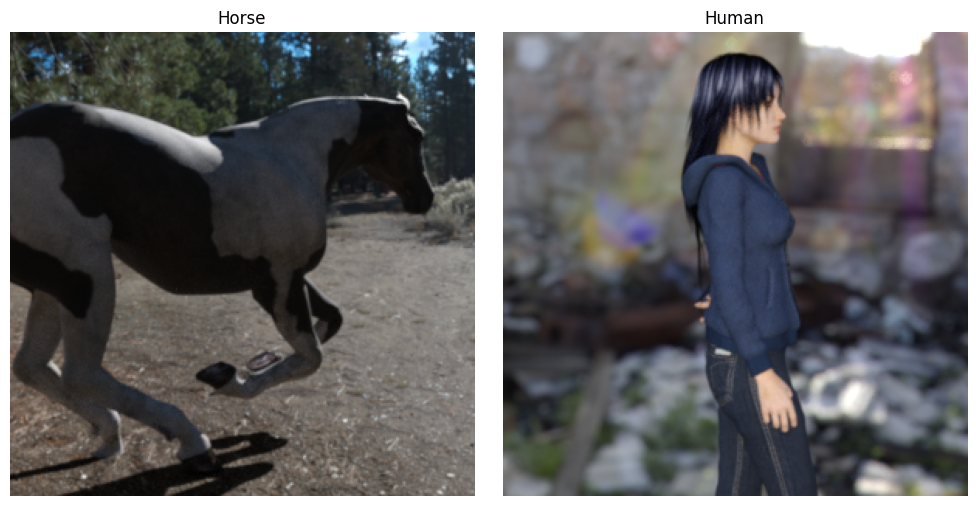

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the PNG file
image_horse = [mpimg.imread(path) for path in horse_image_paths]
image_human = [mpimg.imread(path) for path in human_image_paths]

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_horse[0])
axes[0].axis('off')
axes[0].set_title('Horse')
axes[1].imshow(image_human[0])
axes[1].set_title('Human')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
subset_of_imgs = image_horse[:8] + image_human[:8]

In [ ]:
# print total imgs in the directories

print('total horses imgs:', len(os.listdir(train_horse)))
print('total humans imgs:', len(os.listdir(train_human)))

total horses imgs: 500
total humans imgs: 527


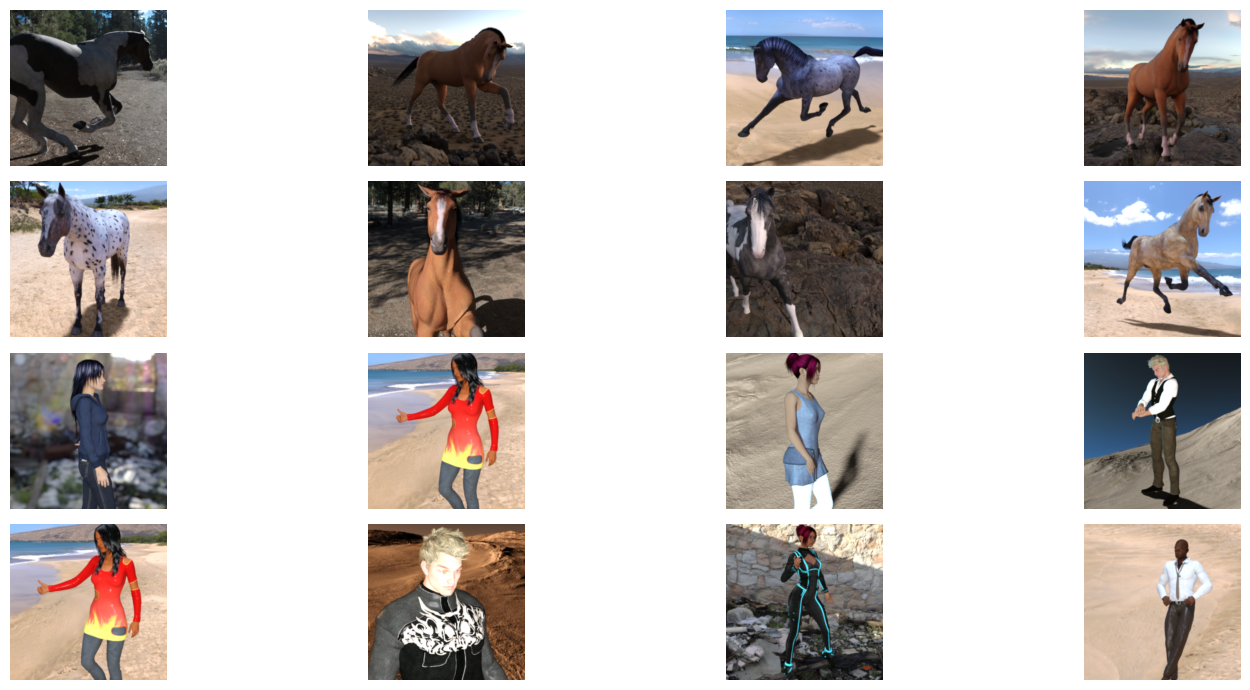

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(16, 7))
axes = axes.flatten()

for ax, img in zip(axes, subset_of_imgs):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()




## Defining the model

In [ ]:
image_human[0].shape

(300, 300, 4)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = keras.Sequential([
    # 1st convolution
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D(2, 2),
    # 2nd convolution
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # 3rd convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # 4th convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # 5th convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    # since we use binary crossentropy loss, we need binary labels
    class_mode='binary'
)


history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Found 1027 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 102s 13s/step - acc: 0.5669 - loss: 0.6970
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.9531 - loss: 0.5793 
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 101s 11s/step - acc: 0.8914 - loss: 0.3975
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - acc: 0.8828 - loss: 0.2277 
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 129s 11s/step - acc: 0.8817 - loss: 0.3425
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - acc: 0.8984 - loss: 0.3529 
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 126s 11s/step - acc: 0.9325 - loss: 0.2211
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - acc: 0.9609 - loss: 0.1088 
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 127s 11s/step - acc: 0.9477 - loss: 0.1224
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - acc: 0.9609 - loss: 0.0782 
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 97s 11s/step - acc: 0.9750 - loss: 0.0743
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - acc: 0.9375 - loss: 0.1376 
Epoch 13/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 134s 11s/step - acc: 0.9529 - loss: 0.1663
Epoch 14/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.7344 - loss: 0.7735 
Epoch 15/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 97s 11s/step - acc: 0.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,112,293 (19.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,408,196 (13.00 MB)

In [ ]:
# Upload your own image to see how well the model is performing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

This model is detecting images not always with exact precision because we've trained it on only 500 images. It is overfitting, the model didn't see other images so on the testing data it gives 99% accuracy